In [ ]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Simple Linear Regression

In [2]:
df=pd.read_csv("advertising.csv",usecols=['TV','Sales'])

In [3]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [4]:
df.shape

(200, 2)

In [5]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


# Distribution of target(Dependent Variable)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

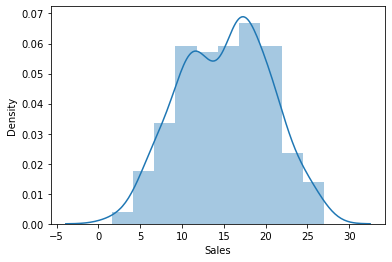

In [6]:
sns.distplot(df['Sales'])

In [7]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

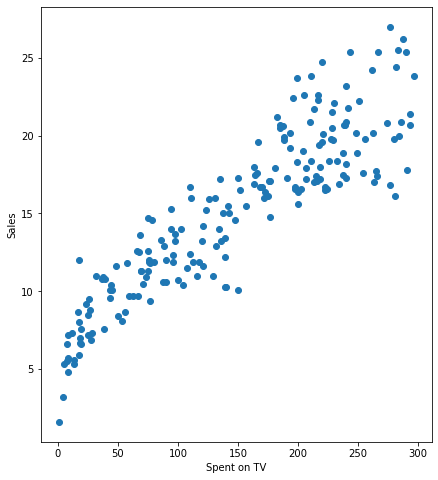

In [11]:
plt.figure(figsize=(7,8))
plt.scatter(x=df['TV'],y=df['Sales'])
plt.xlabel("Spent on TV")
plt.ylabel("Sales")
plt.show()

In [12]:
corr=df.corr()

<AxesSubplot:>

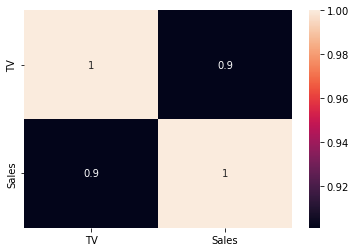

In [14]:
sns.heatmap(corr,annot=True)

In [23]:
X=df[["TV"]] #Independent Variable
y=df['Sales'] #Dependent Variable

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [26]:
X_train.shape

(160, 1)

In [28]:
X_test.shape

(40, 1)

In [29]:
y_train.shape

(160,)

In [30]:
y_test.shape

(40,)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred_test=lr.predict(X_test)

Text(0.5, 1.0, 'Sales Vs TV Spending')

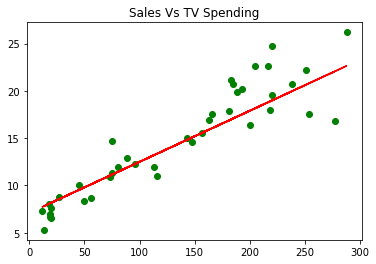

In [45]:
plt.scatter(X_test,y_test,color='green') #Actual Values
plt.plot(X_test,y_pred_test,color='red') #predicted Values
plt.title("Sales Vs TV Spending")

In [34]:
y_pred_test

array([17.89340189, 11.42913734, 11.13186765,  9.51039661, 15.05582757,
       19.96888482, 16.0449249 , 16.96375849, 17.27724289,  7.72677846,
       11.16429707, 18.17445687, 10.13196051,  8.10512171,  7.80244711,
       13.19654077, 16.86647023, 22.04977265,  8.11052661, 18.89871393,
        8.15376584, 11.86693452,  8.06188248,  9.79685649, 19.0014071 ,
        8.54291889, 15.55848359, 14.81801181, 12.29392189, 18.79061586,
       13.36409278, 20.65530756, 22.63890713,  8.14295603, 17.53667826,
       18.97438258, 20.81204976, 17.08807127, 15.92061212, 11.0616039 ])

In [35]:
y_pred_train=lr.predict(X_train)

In [36]:
y_pred_train

array([10.46165962, 22.26596879, 11.32103927, 21.44982837, 19.43379937,
       15.98547096, 16.6610839 , 19.11491007, 17.77449401, 13.02898877,
       14.6342451 , 19.29867679, 22.96320134, 14.73153336, 11.17510688,
       11.72640703, 10.66704595, 22.06058246, 13.60731344, 20.02833876,
       20.05536327, 11.98043749, 16.59082015, 14.67748432,  7.55922646,
       13.63433795, 17.24481347, 14.35319012, 21.52009211, 12.64524062,
       20.54180459, 12.36418564, 14.21266263, 11.22375101, 12.16960911,
        8.45103553,  8.02404816, 15.19095015,  7.13223908,  9.98602811,
       13.59109873, 22.92536701, 16.29355046,  7.54841665, 10.91026661,
       22.80645914, 19.53108764, 22.55242867, 16.55839073, 21.88762555,
       18.03933428, 18.48253636, 20.23912999, 11.94260317, 11.80748058,
        7.56463136, 10.75892931, 22.46054532, 10.82378815, 18.62846876,
       21.21741752,  9.15907788,  9.42391815, 20.07157798, 21.29308617,
       12.74793379,  9.14826808, 18.90411883, 15.93142193, 19.01

Text(0.5, 1.0, 'Sales Vs TV Spending')

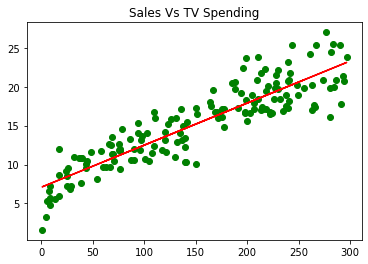

In [46]:
plt.scatter(X_train,y_train,color='green') #Actual Values
plt.plot(X_train,y_pred_train,color='red') #predicted Values
plt.title("Sales Vs TV Spending")

In [54]:
from sklearn.metrics import r2_score,mean_squared_error

In [59]:
print("Train Data")
mse=mean_squared_error(y_train,y_pred_train)
RMSE=np.sqrt(mse)
print("R2 Score is ",round(r2_score(y_train,y_pred_train),2))
print("RMSE is",round(RMSE,2))
print("Test Data")
print("R2 Score is ",round(r2_score(y_test,y_pred_test),2))


Train Data
R2 Score is  0.8
RMSE is 2.29
Test Data
R2 Score is  0.84


In [64]:
def metric(y_actual,y_pred):
    r2=r2_score(y_actual,y_pred)
    RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
    print("R2 Score: {} | RMSE: {}".format(round(r2,2),round(RMSE,2)))


In [66]:
print("Training Performance")
metric(y_train,y_pred_train)
print("Testing Performance")
metric(y_test,y_pred_test)

Training Performance
R2 Score: 0.8 | RMSE: 2.29
Testing Performance
R2 Score: 0.84 | RMSE: 2.3


In [67]:
lr.intercept_

7.094404759150407

In [69]:
lr.coef_[0]

0.054049034670669134

# Predicting Sales for 150$

In [81]:
print("Pridected Spending for TV:",round(lr.predict([[150]])[0],2))

Pridected Spending for TV: 15.2


In [76]:
y_pred=lr.coef_[0]*150+lr.intercept_

In [80]:
print("Predicted Spending for TV",round(y_pred,2))

Predicted Spending for TV 15.2


# Multiple Linear Regression